In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('D:/Research/toy/coss/target_decoy/NN_target.xlsx')
NNt1.head()

,File,Title,Rank,Library,Scan No.,RetentionT,Sequence,Prec. Mass,ChargeQuery,ChargeLib,...,Validation(FDR),Mods,Protein,#filteredQueryPeaks,#filteredLibraryPeaks,SumIntQuery,SumIntLib,#MatchedPeaks,MatchedIntQuery,MatchedIntLib
0,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.30313.3031...,3,1,30313,6533.0556,AAAAVAAAASSCR,588.791044,2+,2,...,NaN,"1/11,C,Carbamidomethyl","""Target""",73,49,9.683750e+07,5.373013e+06,1,341538.937500,40068.9
1,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.31389.3138...,3,1,31389,6694.8768,AAAAVAAAASSCR,588.792552,2+,2,...,NaN,"1/11,C,Carbamidomethyl","""Target""",47,37,1.215565e+08,5.145394e+06,1,501368.812500,40068.9
2,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.50206.5020...,3,1,50206,9476.5422,AAADLMTYCDAHACEDPLITPVPTSENPFR,841.382831,2+,4,...,NaN,"2/8,C,Carbamidomethyl/13,C,Carbamidomethyl","""Target""",70,78,3.265305e+05,1.204420e+06,5,222092.277100,19743.0
3,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.38690.3869...,2,1,38690,7777.7640,AAAASVPNADGLK,592.811890,2+,2,...,NaN,0,"""Target""",31,25,2.653755e+06,5.246196e+06,3,197890.449219,783986.1
4,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.37283.3728...,3,1,37283,7573.7478,AAAAALSQQQSLQER,786.406921,2+,2,...,NaN,0,"""Target""",69,71,1.093031e+07,8.808289e+05,7,72665.869141,752098.9


In [3]:
NNd1 = pd.read_excel('D:/Research/toy/coss/target_decoy/NN_decoy.xlsx')
NNd1.head()

,File,Title,Rank,Library,Scan No.,RetentionT,Sequence,Prec. Mass,ChargeQuery,ChargeLib,...,Validation(FDR),Mods,Protein,#filteredQueryPeaks,#filteredLibraryPeaks,SumIntQuery,SumIntLib,#MatchedPeaks,MatchedIntQuery,MatchedIntLib
0,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.11644.1164...,1,1,11644,3440.08866,QQDEFTVNVDEAAAK,563.817047,2+,3,...,NaN,0,"""XXX""",12,17,2.098732e+06,8.322883e+05,6,4.303007e+05,852796.2
1,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.22239.2223...,1,1,22239,5248.14186,IVFQGAVEAAAK,406.888275,3+,3,...,NaN,0,"""XXX""",36,34,7.352427e+05,5.409679e+05,10,3.044054e+05,158276.5
2,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.5220.5220....,1,1,5220,2246.66892,DLSGAAAAR,447.295662,2+,2,...,NaN,0,"""XXX""",35,33,2.921650e+06,3.853552e+05,10,1.059110e+06,192316.1
3,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.5861.5861....,1,1,5861,2372.52786,GIQGLAWAAAAR,597.248501,2+,2,...,NaN,0,"""XXX""",27,28,3.288513e+05,1.244076e+06,7,3.973943e+05,100393.4
4,precursor_swap,b1906_293T_proteinID_01A_QE3_122212.9661.9661....,1,1,9661,3073.21620,DLSGAAAAR,424.713983,2+,2,...,NaN,0,"""XXX""",22,21,2.023012e+06,3.376489e+05,6,7.958000e+05,118666.6


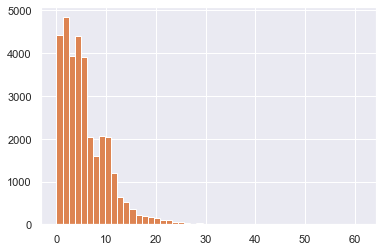

In [4]:
nnt1 = plt.hist(NNt1['Score'], bins = 50)
nnd1 = plt.hist(NNd1['Score'], bins = 50)

0.26882
1.2238200000000001


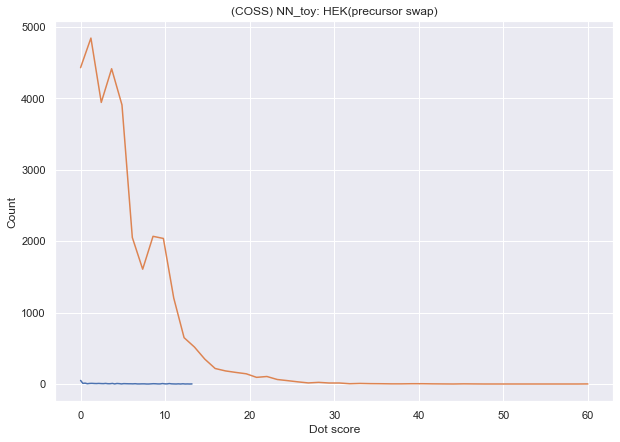

In [5]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('(COSS) NN_toy: HEK(precursor swap)')
plt.plot(nnt1[1][:-1] + 0.0055, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.004, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

225
33139


In [7]:
NNt3 = NNt1['Score']
NNd3 = NNd1['Score']

score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ', score)
    
    nnt = 0
    nnd = 0
    
    for j in NNt3:
        if j >= score:
            nnt += 1
    print('nnt: ', nnt)
    
    for k in NNd3:
        if k >= score:
            nnd += 1
    print('nnd: ', nnd)
    
    print('FDR: ', nnd / nnt)
    print("\n")
    
    if (nnd / nnt) <= 0.01:
        print(nnt)
        print(nnd)
        print(nnd / nnt)
        print(score)
        break
"""
결과

"""

score:  0.001
nnt:  194
nnd:  32893
FDR:  169.55154639175257


score:  0.002
nnt:  194
nnd:  32883
FDR:  169.5


score:  0.003
nnt:  194
nnd:  32881
FDR:  169.48969072164948


score:  0.004
nnt:  194
nnd:  32868
FDR:  169.42268041237114


score:  0.005
nnt:  194
nnd:  32867
FDR:  169.41752577319588


score:  0.006
nnt:  194
nnd:  32866
FDR:  169.41237113402062


score:  0.007
nnt:  194
nnd:  32864
FDR:  169.4020618556701


score:  0.008
nnt:  194
nnd:  32858
FDR:  169.37113402061857


score:  0.009000000000000001
nnt:  194
nnd:  32851
FDR:  169.33505154639175


score:  0.010000000000000002
nnt:  193
nnd:  32843
FDR:  170.17098445595855


score:  0.011000000000000003
nnt:  193
nnd:  32841
FDR:  170.16062176165804


score:  0.012000000000000004
nnt:  193
nnd:  32834
FDR:  170.12435233160622


score:  0.013000000000000005
nnt:  193
nnd:  32834
FDR:  170.12435233160622


score:  0.014000000000000005
nnt:  192
nnd:  32830
FDR:  170.98958333333334


score:  0.015000000000000006
nnt:  192
nnd

nnd:  32409
FDR:  179.05524861878453


score:  0.1410000000000001
nnt:  181
nnd:  32406
FDR:  179.03867403314916


score:  0.1420000000000001
nnt:  181
nnd:  32403
FDR:  179.02209944751382


score:  0.1430000000000001
nnt:  181
nnd:  32401
FDR:  179.0110497237569


score:  0.1440000000000001
nnt:  181
nnd:  32397
FDR:  178.9889502762431


score:  0.1450000000000001
nnt:  181
nnd:  32389
FDR:  178.94475138121547


score:  0.1460000000000001
nnt:  181
nnd:  32370
FDR:  178.83977900552486


score:  0.1470000000000001
nnt:  181
nnd:  32369
FDR:  178.8342541436464


score:  0.1480000000000001
nnt:  181
nnd:  32367
FDR:  178.8232044198895


score:  0.1490000000000001
nnt:  181
nnd:  32366
FDR:  178.81767955801104


score:  0.1500000000000001
nnt:  181
nnd:  32365
FDR:  178.8121546961326


score:  0.1510000000000001
nnt:  181
nnd:  32365
FDR:  178.8121546961326


score:  0.1520000000000001
nnt:  181
nnd:  32363
FDR:  178.8011049723757


score:  0.1530000000000001
nnt:  181
nnd:  32363
FDR:  1

FDR:  182.86857142857144


score:  0.2730000000000002
nnt:  175
nnd:  32001
FDR:  182.86285714285714


score:  0.2740000000000002
nnt:  175
nnd:  32001
FDR:  182.86285714285714


score:  0.2750000000000002
nnt:  175
nnd:  31997
FDR:  182.84


score:  0.2760000000000002
nnt:  175
nnd:  31993
FDR:  182.81714285714287


score:  0.2770000000000002
nnt:  175
nnd:  31989
FDR:  182.7942857142857


score:  0.2780000000000002
nnt:  175
nnd:  31988
FDR:  182.78857142857143


score:  0.2790000000000002
nnt:  175
nnd:  31983
FDR:  182.76


score:  0.2800000000000002
nnt:  175
nnd:  31982
FDR:  182.75428571428571


score:  0.2810000000000002
nnt:  175
nnd:  31951
FDR:  182.57714285714286


score:  0.2820000000000002
nnt:  175
nnd:  31948
FDR:  182.56


score:  0.2830000000000002
nnt:  175
nnd:  31945
FDR:  182.54285714285714


score:  0.2840000000000002
nnt:  175
nnd:  31945
FDR:  182.54285714285714


score:  0.2850000000000002
nnt:  175
nnd:  31944
FDR:  182.53714285714287


score:  0.286000000000

nnd:  31632
FDR:  187.1715976331361


score:  0.3910000000000003
nnt:  169
nnd:  31631
FDR:  187.1656804733728


score:  0.3920000000000003
nnt:  169
nnd:  31627
FDR:  187.14201183431953


score:  0.3930000000000003
nnt:  169
nnd:  31626
FDR:  187.1360946745562


score:  0.3940000000000003
nnt:  169
nnd:  31624
FDR:  187.12426035502958


score:  0.3950000000000003
nnt:  169
nnd:  31621
FDR:  187.10650887573965


score:  0.3960000000000003
nnt:  169
nnd:  31619
FDR:  187.09467455621302


score:  0.3970000000000003
nnt:  169
nnd:  31617
FDR:  187.0828402366864


score:  0.3980000000000003
nnt:  169
nnd:  31616
FDR:  187.07692307692307


score:  0.3990000000000003
nnt:  169
nnd:  31613
FDR:  187.05917159763314


score:  0.4000000000000003
nnt:  169
nnd:  31611
FDR:  187.0473372781065


score:  0.4010000000000003
nnt:  169
nnd:  31611
FDR:  187.0473372781065


score:  0.4020000000000003
nnt:  169
nnd:  31608
FDR:  187.02958579881656


score:  0.4030000000000003
nnt:  169
nnd:  31605
FDR:  

nnd:  31242
FDR:  188.20481927710844


score:  0.5190000000000003
nnt:  166
nnd:  31242
FDR:  188.20481927710844


score:  0.5200000000000004
nnt:  166
nnd:  31241
FDR:  188.1987951807229


score:  0.5210000000000004
nnt:  166
nnd:  31240
FDR:  188.19277108433735


score:  0.5220000000000004
nnt:  166
nnd:  31239
FDR:  188.1867469879518


score:  0.5230000000000004
nnt:  166
nnd:  31239
FDR:  188.1867469879518


score:  0.5240000000000004
nnt:  166
nnd:  31235
FDR:  188.16265060240963


score:  0.5250000000000004
nnt:  166
nnd:  31232
FDR:  188.14457831325302


score:  0.5260000000000004
nnt:  166
nnd:  31231
FDR:  188.13855421686748


score:  0.5270000000000004
nnt:  166
nnd:  31230
FDR:  188.13253012048193


score:  0.5280000000000004
nnt:  166
nnd:  31225
FDR:  188.1024096385542


score:  0.5290000000000004
nnt:  166
nnd:  31222
FDR:  188.0843373493976


score:  0.5300000000000004
nnt:  166
nnd:  31183
FDR:  187.84939759036143


score:  0.5310000000000004
nnt:  166
nnd:  31183
FDR: 

nnd:  30777
FDR:  191.1614906832298


score:  0.6450000000000005
nnt:  161
nnd:  30776
FDR:  191.1552795031056


score:  0.6460000000000005
nnt:  161
nnd:  30774
FDR:  191.14285714285714


score:  0.6470000000000005
nnt:  161
nnd:  30773
FDR:  191.13664596273293


score:  0.6480000000000005
nnt:  161
nnd:  30771
FDR:  191.12422360248448


score:  0.6490000000000005
nnt:  161
nnd:  30770
FDR:  191.11801242236024


score:  0.6500000000000005
nnt:  161
nnd:  30770
FDR:  191.11801242236024


score:  0.6510000000000005
nnt:  161
nnd:  30767
FDR:  191.09937888198758


score:  0.6520000000000005
nnt:  161
nnd:  30767
FDR:  191.09937888198758


score:  0.6530000000000005
nnt:  161
nnd:  30765
FDR:  191.08695652173913


score:  0.6540000000000005
nnt:  161
nnd:  30764
FDR:  191.08074534161491


score:  0.6550000000000005
nnt:  161
nnd:  30763
FDR:  191.07453416149067


score:  0.6560000000000005
nnt:  161
nnd:  30763
FDR:  191.07453416149067


score:  0.6570000000000005
nnt:  161
nnd:  30762
FD

nnd:  30259
FDR:  195.21935483870968


score:  0.7640000000000006
nnt:  155
nnd:  30256
FDR:  195.2


score:  0.7650000000000006
nnt:  155
nnd:  30250
FDR:  195.16129032258064


score:  0.7660000000000006
nnt:  155
nnd:  30249
FDR:  195.15483870967742


score:  0.7670000000000006
nnt:  155
nnd:  30249
FDR:  195.15483870967742


score:  0.7680000000000006
nnt:  155
nnd:  30246
FDR:  195.13548387096773


score:  0.7690000000000006
nnt:  155
nnd:  30246
FDR:  195.13548387096773


score:  0.7700000000000006
nnt:  155
nnd:  30245
FDR:  195.1290322580645


score:  0.7710000000000006
nnt:  155
nnd:  30244
FDR:  195.1225806451613


score:  0.7720000000000006
nnt:  155
nnd:  30242
FDR:  195.10967741935485


score:  0.7730000000000006
nnt:  155
nnd:  30240
FDR:  195.09677419354838


score:  0.7740000000000006
nnt:  155
nnd:  30238
FDR:  195.08387096774194


score:  0.7750000000000006
nnt:  155
nnd:  30236
FDR:  195.07096774193548


score:  0.7760000000000006
nnt:  155
nnd:  30231
FDR:  195.03870

nnd:  29812
FDR:  194.84967320261438


score:  0.8940000000000007
nnt:  153
nnd:  29810
FDR:  194.83660130718954


score:  0.8950000000000007
nnt:  153
nnd:  29804
FDR:  194.79738562091504


score:  0.8960000000000007
nnt:  153
nnd:  29802
FDR:  194.7843137254902


score:  0.8970000000000007
nnt:  153
nnd:  29798
FDR:  194.75816993464053


score:  0.8980000000000007
nnt:  153
nnd:  29791
FDR:  194.71241830065358


score:  0.8990000000000007
nnt:  153
nnd:  29787
FDR:  194.68627450980392


score:  0.9000000000000007
nnt:  153
nnd:  29785
FDR:  194.67320261437908


score:  0.9010000000000007
nnt:  153
nnd:  29781
FDR:  194.64705882352942


score:  0.9020000000000007
nnt:  153
nnd:  29735
FDR:  194.34640522875816


score:  0.9030000000000007
nnt:  153
nnd:  29733
FDR:  194.33333333333334


score:  0.9040000000000007
nnt:  153
nnd:  29732
FDR:  194.32679738562092


score:  0.9050000000000007
nnt:  153
nnd:  29725
FDR:  194.281045751634


score:  0.9060000000000007
nnt:  153
nnd:  29724
FDR

'\n결과\n\n'